In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [22]:
data = pd.read_csv(r'F:\DataFountain\train_dataset\train_dataset_3.csv')
data.head(5)

,用户编码,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,...,中心化当月火车类应用使用次数,中心化当月旅游资讯类应用使用次数,个人价值准则,交费及时性2,支付方式,支付方式_0,支付方式_1,支付方式_2,花费稳定性,业务持久度
0,a4651f98c82948b186bdcdc8108381b4,1,44,0,0,0,186,1,99.80,163.86,...,0.0,0.0030,1.230143,0.647399,1,0,1,0,0.942793,0.885730
1,aeb10247db4e4d67b2550bbc42ff9827,1,18,0,0,1,5,1,29.94,153.28,...,0.0,0.0000,0.577903,0.615740,1,0,1,0,0.916730,1.332870
2,5af23a1e0e77410abb25e9a7eee510aa,1,47,0,0,0,145,1,49.90,109.64,...,0.0,0.0001,0.290283,0.583120,1,0,1,0,1.048500,1.461867
3,43c64379d3c24a15b8478851b22049e4,1,55,0,0,0,234,1,99.80,92.97,...,0.0,0.0005,0.975668,0.616745,1,0,1,0,1.708890,0.978632
4,f1687f3b8a6f4910bd0b13eb634056e2,1,40,0,0,0,76,1,49.90,95.47,...,0.0,0.0000,0.525130,0.577611,1,0,1,0,1.005275,1.123176


In [24]:
data = data.set_index(u'用户编码')

In [25]:
data.corr()[u'信用分']

用户实名制是否通过核实          0.028929
用户年龄                 0.037748
是否大学生客户              0.025332
是否黑名单客户              0.110346
是否4G不健康客户           -0.147354
用户网龄（月）              0.546903
用户最近一次缴费距今时长（月）      0.213494
缴费用户最近一次缴费金额（元）      0.350177
用户近6个月平均消费值（元）       0.498078
用户账单当月总费用（元）         0.452458
用户当月账户余额（元）          0.188667
缴费用户当前是否欠费缴费         0.089759
用户话费敏感度             -0.240442
当月通话交往圈人数            0.477218
是否经常逛商场的人            0.113156
近三个月月均商场出现次数         0.197656
当月是否逛过福州仓山万达         0.051424
当月是否到过福州山姆会员店        0.054157
当月是否看电影              0.165271
当月是否景点游览             0.270649
当月是否体育场馆消费           0.232768
当月网购类应用使用次数          0.160004
当月物流快递类应用使用次数        0.001057
当月金融理财类应用使用总次数       0.245951
当月视频播放类应用使用次数        0.161497
当月飞机类应用使用次数          0.029353
当月火车类应用使用次数          0.032578
当月旅游资讯类应用使用次数        0.022957
信用分                  1.000000
交费及时性                0.448478
('当月缴费',)           -0.004687
('次月缴费',)            0.213494
('好久没缴费',)          -0.213949
敏感度_1     

In [28]:
x_train = data[[u'用户实名制是否通过核实',u'是否大学生客户',u'是否4G不健康客户',u'用户网龄（月）',u'用户最近一次缴费距今时长（月）',u'缴费用户最近一次缴费金额（元）',
               u'用户近6个月平均消费值（元）',u'用户账单当月总费用（元）',u'用户当月账户余额（元）',u'当月通话交往圈人数',u'敏感度_1',
              u'敏感度_2',u'敏感度_3',u'敏感度_4',u'敏感度_5',u'个人价值准则',u'支付方式_0',u'支付方式_1',u'支付方式_2',u'花费稳定性',
              u'业务持久度']]
y_train = data[u'信用分']

In [34]:
cv_params = {'n_estimators':[220,230,240,250,260]}
other_params = {'learning_rate':0.1,'n_estimators':350,'max_depth':5,'min_child_weight':1,'seed':0,
               'subsample':0.8,'colsample_bytree':0.8,'gamma':0,'reg_alpha':0,'reg_lambda':1}

model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model,param_grid=cv_params,scoring='neg_mean_absolute_error',cv=5,verbose=1,n_jobs=4)
optimized_GBM.fit(x_train,y_train)
#evalute_result = optimized_GBM.grid_scores_
#print('每轮迭代运行结果：',evalute_result)
print('参数的最佳取值：',optimized_GBM.best_params_)
print('最佳模型得分：',optimized_GBM.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  4.0min finished


参数的最佳取值： {'n_estimators': 240}
最佳模型得分： -15.47118833916286


In [35]:
cv_params = {'max_depth':[3,4,5,6,7,8,9,10],'min_child_weight':[1,2,3,4,5,6]}
other_params = {'learning_rate':0.1,'n_estimators':240,'max_depth':5,'min_child_weight':1,'seed':0,
               'subsample':0.8,'colsample_bytree':0.8,'gamma':0,'reg_alpha':0,'reg_lambda':1}

model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model,param_grid=cv_params,scoring='neg_mean_absolute_error',cv=5,verbose=1,n_jobs=4)
optimized_GBM.fit(x_train,y_train)
print('参数的最佳取值：',optimized_GBM.best_params_)
print('最佳模型得分：',optimized_GBM.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 30.2min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed: 42.4min finished


参数的最佳取值： {'max_depth': 5, 'min_child_weight': 4}
最佳模型得分： -15.464887370794893


In [36]:
cv_params = {'gamma':[0.1,0.2,0.3,0.4,0.5,0.6]}
other_params = {'learning_rate':0.1,'n_estimators':240,'max_depth':5,'min_child_weight':4,'seed':0,
               'subsample':0.8,'colsample_bytree':0.8,'gamma':0,'reg_alpha':0,'reg_lambda':1}

model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model,param_grid=cv_params,scoring='neg_mean_absolute_error',cv=5,verbose=1,n_jobs=4)
optimized_GBM.fit(x_train,y_train)
print('参数的最佳取值：',optimized_GBM.best_params_)
print('最佳模型得分：',optimized_GBM.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  4.4min finished


参数的最佳取值： {'gamma': 0.1}
最佳模型得分： -15.464887370794893


In [37]:
cv_params = {'subsample':[0.6,0.7,0.8,0.9],'colsample_bytree':[0.6,0.7,0.8,0.9]}
other_params = {'learning_rate':0.1,'n_estimators':240,'max_depth':5,'min_child_weight':4,'seed':0,
               'subsample':0.8,'colsample_bytree':0.8,'gamma':0.1,'reg_alpha':0,'reg_lambda':1}

model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model,param_grid=cv_params,scoring='neg_mean_absolute_error',cv=5,verbose=1,n_jobs=4)
optimized_GBM.fit(x_train,y_train)
print('参数的最佳取值：',optimized_GBM.best_params_)
print('最佳模型得分：',optimized_GBM.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed: 10.4min finished


参数的最佳取值： {'colsample_bytree': 0.6, 'subsample': 0.9}
最佳模型得分： -15.450736359619135


In [38]:
cv_params = {'reg_alpha':[0.05,0.1,0.5,1,2,3],'reg_lambda':[0.05,0.1,0.5,1,2,3]}
other_params = {'learning_rate':0.1,'n_estimators':240,'max_depth':5,'min_child_weight':4,'seed':0,
               'subsample':0.9,'colsample_bytree':0.6,'gamma':0.1,'reg_alpha':0,'reg_lambda':1}

model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model,param_grid=cv_params,scoring='neg_mean_absolute_error',cv=5,verbose=1,n_jobs=4)
optimized_GBM.fit(x_train,y_train)
print('参数的最佳取值：',optimized_GBM.best_params_)
print('最佳模型得分：',optimized_GBM.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed: 20.3min finished


参数的最佳取值： {'reg_alpha': 3, 'reg_lambda': 3}
最佳模型得分： -15.441066376192301


In [39]:
cv_params = {'learning_rate':0.1}
other_params = {'learning_rate':0.1,'n_estimators':240,'max_depth':5,'min_child_weight':4,'seed':0,
               'subsample':0.9,'colsample_bytree':0.6,'gamma':0.1,'reg_alpha':3,'reg_lambda':3}

model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model,param_grid=cv_params,scoring='neg_mean_absolute_error',cv=5,verbose=1,n_jobs=4)
optimized_GBM.fit(x_train,y_train)
print('参数的最佳取值：',optimized_GBM.best_params_)
print('最佳模型得分：',optimized_GBM.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  3.2min finished


参数的最佳取值： {'learning_rate': 0.07}
最佳模型得分： -15.438118485267507


In [40]:
import matplotlib.pyplot as plt

model = xgb.XGBRegressor(learning_rate=0.07,n_estimators=240,max_depth=5,min_child_weight=4,seed=0,
                        subsample=0.9,colsample_bytree=0.6,gamma=0.1,reg_alpha=3,reg_lambda=3)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.1, learning_rate=0.07,
       max_delta_step=0, max_depth=5, min_child_weight=4, missing=None,
       n_estimators=240, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=3, reg_lambda=3, scale_pos_weight=1,
       seed=0, silent=True, subsample=0.9)

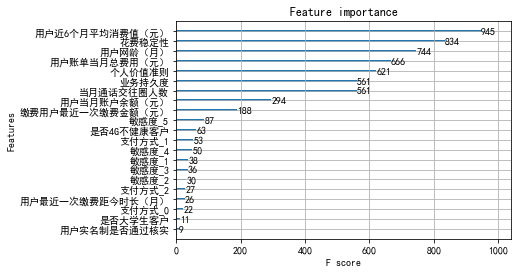

In [43]:
from xgboost import plot_importance
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plot_importance(model)
plt.show()

In [45]:
test_data = pd.read_csv(r'F:\DataFountain\test_dataset\test_dataset.csv')
test_data.loc[test_data[u'用户话费敏感度']==0,u'用户话费敏感度'] = 3

In [55]:
b = pd.get_dummies(test_data[u'用户话费敏感度'],prefix='敏感度')
b.head(5)

,敏感度_1,敏感度_2,敏感度_3,敏感度_4,敏感度_5
0,0,0,0,1,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,0,0,0,1,0


In [56]:
test_data = test_data.join(b)

In [49]:
test_data.loc[test_data[u'用户近6个月平均消费值（元）'] > 500,u'用户近6个月平均消费值（元）'] = 500

In [50]:
test_data.loc[test_data[u'用户近6个月平均消费值（元）']==0,u'用户近6个月平均消费值（元）'] = test_data[u'用户近6个月平均消费值（元）'].mean()

In [51]:
test_data.loc[test_data[u'用户账单当月总费用（元）'] > 500,u'用户账单当月总费用（元）'] = 500

In [52]:
for index,i in enumerate(test_data[u'用户账单当月总费用（元）']):
    if i == 0:
        test_data[u'用户账单当月总费用（元）'].iloc[index] = test_data[u'用户近6个月平均消费值（元）'].iloc[index]

H:\anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [53]:
test_data.loc[test_data[u'用户当月账户余额（元）'] > 500,u'用户当月账户余额（元）'] = 500

In [54]:
test_data[u'支付方式'] = 0
test_data.loc[test_data[u'缴费用户最近一次缴费金额（元）']%5 != 0,u'支付方式'] = 1
test_data.loc[test_data[u'缴费用户最近一次缴费金额（元）']%5 == 0,u'支付方式'] = 2
test_data.loc[test_data[u'缴费用户最近一次缴费金额（元）'] == 0,u'支付方式'] = 0
b = pd.get_dummies(test_data[u'支付方式'],prefix='支付方式')
test_data = test_data.join(b)

In [58]:
test_data.loc[test_data[u'缴费用户最近一次缴费金额（元）'] > 230,u'缴费用户最近一次缴费金额（元）'] = 230

In [59]:
test_data[u'中心化近三个月月均商场出现次数'] = test_data[u'近三个月月均商场出现次数']/(test_data[u'近三个月月均商场出现次数'].max())
test_data.loc[test_data[u'当月网购类应用使用次数'] > 2000,u'当月网购类应用使用次数'] = 2000
test_data.loc[test_data[u'当月金融理财类应用使用总次数'] > 2500,u'当月金融理财类应用使用总次数'] = 2500
test_data.loc[test_data[u'当月视频播放类应用使用次数'] > 6000,u'当月视频播放类应用使用次数'] = 6000
test_data.loc[test_data[u'当月飞机类应用使用次数'] > 1000,u'当月飞机类应用使用次数'] = 1000
test_data.loc[test_data[u'当月火车类应用使用次数'] > 500,u'当月火车类应用使用次数'] = 500
test_data.loc[test_data[u'当月旅游资讯类应用使用次数'] > 10000,u'当月旅游资讯类应用使用次数'] = 10000
test_data[u'中心化当月网购类应用使用次数'] = (test_data[u'当月网购类应用使用次数'])/(test_data[u'当月网购类应用使用次数'].max())
test_data[u'中心化当月金融理财类应用使用总次数'] = (test_data[u'当月金融理财类应用使用总次数'])/(test_data[u'当月金融理财类应用使用总次数'].max())
test_data[u'中心化当月视频播放类应用使用次数'] = (test_data[u'当月视频播放类应用使用次数'])/(test_data[u'当月视频播放类应用使用次数'].max())
test_data[u'中心化当月飞机类应用使用次数'] = (test_data[u'当月飞机类应用使用次数'])/(test_data[u'当月飞机类应用使用次数'].max())
test_data[u'中心化当月火车类应用使用次数'] = (test_data[u'当月火车类应用使用次数'])/(test_data[u'当月火车类应用使用次数'].max())
test_data[u'中心化当月旅游资讯类应用使用次数'] = (test_data[u'当月旅游资讯类应用使用次数'])/(test_data[u'当月旅游资讯类应用使用次数'].max())

In [60]:
test_data[u'个人价值准则'] = test_data[u'中心化近三个月月均商场出现次数']*0.2 + test_data[u'中心化当月网购类应用使用次数']*0.16 + test_data[u'中心化当月金融理财类应用使用总次数']*0.24 + test_data[u'中心化当月视频播放类应用使用次数']*0.16 + test_data[u'中心化当月飞机类应用使用次数']*0.03 + test_data[u'中心化当月火车类应用使用次数']*0.03 + test_data[u'中心化当月旅游资讯类应用使用次数']*0.02+ test_data[u'是否经常逛商场的人']*0.11 + test_data[u'当月是否逛过福州仓山万达']*0.05 + test_data[u'当月是否到过福州山姆会员店']*0.05+ test_data[u'当月是否看电影']*0.17 + test_data[u'当月是否景点游览']*0.27 + test_data[u'当月是否体育场馆消费']*0.23

In [61]:
test_data[u'花费稳定性'] = test_data[u'用户账单当月总费用（元）'] / (test_data[u'用户近6个月平均消费值（元）'] + 5 )
test_data[u'业务持久度'] = (test_data[u'用户近6个月平均消费值（元）'] ) / (test_data[u'用户当月账户余额（元）'] + 5)

In [63]:
test_data.to_csv(r'F:\DataFountain\test_dataset\test_dataset_1.csv')

In [64]:
x_test = test_data[[u'用户实名制是否通过核实',u'是否大学生客户',u'是否4G不健康客户',u'用户网龄（月）',u'用户最近一次缴费距今时长（月）',u'缴费用户最近一次缴费金额（元）',
               u'用户近6个月平均消费值（元）',u'用户账单当月总费用（元）',u'用户当月账户余额（元）',u'当月通话交往圈人数',u'敏感度_1',
              u'敏感度_2',u'敏感度_3',u'敏感度_4',u'敏感度_5',u'个人价值准则',u'支付方式_0',u'支付方式_1',u'支付方式_2',u'花费稳定性',
              u'业务持久度']]
pred = model.predict(x_test)

In [70]:
pred = np.around(pred,0).astype(int)
pred[0:5]

array([598, 527, 674, 673, 662])

In [71]:
ids = test_data[u'用户编码']
submission = pd.Series(pred,index=ids)
submission.to_csv(r'F:\DataFountain\submission.csv')